# Preprocessing Discrete Variables

In [48]:
# Standard Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Read the data

In [2]:
# Read in the data in pickle format
loan_data = pd.read_pickle('./dataset/loan_data_2014.pkl')

In [3]:
# Preview a sample of the data
loan_data.sample(6)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,mths_since_earliest_cr_line,issue_date_mths,mths_since_issue_date
198041,1532727,1797517,16000,16000,16000.0,60 months,20.49,428.28,E,E1,...,38927.0,NaN,NaN,NaN,5.0,60,1995-03-01,273.0,63.0,63.0
240120,36029744,38741420,26000,26000,26000.0,36 months,6.99,802.69,A,A3,...,57600.0,NaN,NaN,NaN,10.0,36,1992-07-01,305.0,37.0,37.0
118965,6075244,7547405,15000,15000,15000.0,36 months,19.52,553.80,D,D4,...,11500.0,NaN,NaN,NaN,10.0,36,1998-09-01,231.0,53.0,53.0
123910,5787657,7219839,11500,11500,11500.0,36 months,15.31,400.40,C,C2,...,16100.0,NaN,NaN,NaN,7.0,36,2004-09-01,159.0,54.0,54.0
234532,36451417,39173141,20000,20000,20000.0,36 months,8.19,628.49,A,A5,...,34000.0,NaN,NaN,NaN,10.0,36,1986-09-01,375.0,36.0,36.0
430440,12695951,14708108,20000,20000,20000.0,60 months,14.64,472.03,C,C3,...,12700.0,NaN,NaN,NaN,3.0,60,1986-07-01,377.0,45.0,45.0


### Preprocessing a few discrete variables

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           466285 non-null  int64         
 1   member_id                    466285 non-null  int64         
 2   loan_amnt                    466285 non-null  int64         
 3   funded_amnt                  466285 non-null  int64         
 4   funded_amnt_inv              466285 non-null  float64       
 5   term                         466285 non-null  object        
 6   int_rate                     466285 non-null  float64       
 7   installment                  466285 non-null  float64       
 8   grade                        466285 non-null  object        
 9   sub_grade                    466285 non-null  object        
 10  emp_title                    438697 non-null  object        
 11  emp_length                

In [5]:
loan_data['grade']

0         B
1         C
2         C
3         C
4         B
         ..
466280    C
466281    D
466282    D
466283    A
466284    D
Name: grade, Length: 466285, dtype: object

In [6]:
# Create dummy variables for the grade column
pd.get_dummies(loan_data['grade'],prefix = 'grade', prefix_sep = ':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [7]:
# Create dummy variables for other columns
loan_data_dummies = [pd.get_dummies(loan_data['grade'],prefix = 'grade', prefix_sep = ':'),
                    pd.get_dummies(loan_data['sub_grade'],prefix = 'sub_grade', prefix_sep = ':'),
                    pd.get_dummies(loan_data['home_ownership'],prefix = 'home_ownership', prefix_sep = ':'),
                    pd.get_dummies(loan_data['verification_status'],prefix = 'verification_status', prefix_sep = ':'),
                    pd.get_dummies(loan_data['loan_status'],prefix = 'loan_status', prefix_sep = ':'),
                    pd.get_dummies(loan_data['purpose'],prefix = 'purpose', prefix_sep = ':'),
                    pd.get_dummies(loan_data['addr_state'],prefix = 'addr_state', prefix_sep = ':'),
                    pd.get_dummies(loan_data['initial_list_status'],prefix = 'initial_list_status', prefix_sep = ':')]

In [8]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [9]:
# Check the type
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [10]:
# Concat to original DataFrame
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [11]:
# Check if they are appended to the real Dataframe
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

### Check for missing values and clean

In [12]:
pd.options.display.max_rows = None
loan_data.isna().sum()

id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                                                          0
annual_inc                            

The following variables are needed for analysis have a couple of missing values: annual_inc, deling_2yrs, inq_last_6mths, open_acc, pub_rec, total_acc, acc_now_delinq, total_rev_hi_lim, emp_length_int, mths_since_earliest_cr_line. I will be treating these missing values in a different way from one another.

In [13]:
# Total revolving limit
# Assuming the total revolving limit is equal to the funded amount
loan_data['total_rev_hi_lim'].fillna(value = loan_data['funded_amnt'], inplace = True)

In [14]:
# Check the Total revolving limit
loan_data['total_rev_hi_lim'].isna().sum()

0

In [15]:
# Annual Income
loan_data['annual_inc'].fillna(value = loan_data['annual_inc'].mean(), inplace = True)

In [16]:
# The remaining variables: mths_since_earliest_cr_line, acc_now_delinq, total_acc, pub_rec, open_acc, 
# inq_last_6mths, delinq_2yrs, emp_length_int, I will be filling the missing values with 0
loan_data.update(loan_data[['mths_since_earliest_cr_line', 'acc_now_delinq', 'total_acc', 'pub_rec', 'open_acc', 'inq_last_6mths','delinq_2yrs', 'emp_length_int']].fillna(0))

In [17]:
loan_data.isna().sum()

id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                                                          0
annual_inc                            

## PD model

### Dependent Variables. Good/Bad (Default) Definition. Default and Non Default Accounts

In [18]:
# Check the status of accounts which have defaulted or not
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [19]:
# Check how many accounts there are for each status
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [20]:
# Proportion of accounts by status
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [21]:
# Create indicator for a good or bad indicator: Good = 1, Bad = 0
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                               'Does not meet the credit policy. Status:Charged Off',
                                                               'Late (16-30 days)']), 0, 1)

In [22]:
# Check to see if the indicator was created
loan_data['good_bad'].head(6)

0    1
1    0
2    1
3    1
4    1
5    1
Name: good_bad, dtype: int64

## Splitting the Data

In [23]:
# Split the data into training and testing samples
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], random_state = 42, test_size = 0.2 )

In [24]:
# Check the shape of loan data inputs train
loan_data_inputs_train.shape

(373028, 206)

In [25]:
# Check the shape of loan data targets train
loan_data_targets_train.shape

(373028,)

In [26]:
# Check the shape of loan data inputs test
loan_data_inputs_test.shape

(93257, 206)

In [27]:
# Check the shape of loan data targets test
loan_data_targets_test.shape

(93257,)

### More Data Preparation : Calculating the Weight of Evidence

In [28]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train

In [29]:
df_inputs_prepr ['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [30]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.head()

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,1
36159,C,0


In [31]:
grade1 = df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

In [32]:
grade2 = df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

In [33]:
df1 = pd.concat([grade1, grade2], axis = 1)
df1.head()

,grade,good_bad,grade,good_bad
0,A,59759,A,0.964775
1,B,109730,B,0.929199
2,C,100245,C,0.899426
3,D,61498,D,0.864272
4,E,28612,E,0.826821


In [34]:
# Overwrite one of the columns
df1 = df1.iloc[: , [0, 1, 3]]
df1

,grade,good_bad,good_bad
0,A,59759,0.964775
1,B,109730,0.929199
2,C,100245,0.899426
3,D,61498,0.864272
4,E,28612,0.826821
5,F,10530,0.776923
6,G,2654,0.754333


In [35]:
# Change the name of the columns
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

,grade,n_obs,prop_good
0,A,59759,0.964775
1,B,109730,0.929199
2,C,100245,0.899426
3,D,61498,0.864272
4,E,28612,0.826821
5,F,10530,0.776923
6,G,2654,0.754333


In [36]:
# Calc the proportion of observations in each grade
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [37]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,59759,0.964775,0.160200
1,B,109730,0.929199,0.294160
2,C,100245,0.899426,0.268733
3,D,61498,0.864272,0.164862
4,E,28612,0.826821,0.076702
5,F,10530,0.776923,0.028228
6,G,2654,0.754333,0.007115


In [38]:
# Calculate the number of good borrowers and bad borrowers by grade group
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,59759,0.964775,0.160200,57654.0,2105.0
1,B,109730,0.929199,0.294160,101961.0,7769.0
2,C,100245,0.899426,0.268733,90163.0,10082.0
3,D,61498,0.864272,0.164862,53151.0,8347.0
4,E,28612,0.826821,0.076702,23657.0,4955.0
5,F,10530,0.776923,0.028228,8181.0,2349.0
6,G,2654,0.754333,0.007115,2002.0,652.0


In [39]:
# Calculate the proportion of good borrowers and bad borrowers for each grade
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59759,0.964775,0.160200,57654.0,2105.0,0.171197,0.058055
1,B,109730,0.929199,0.294160,101961.0,7769.0,0.302762,0.214264
2,C,100245,0.899426,0.268733,90163.0,10082.0,0.267730,0.278055
3,D,61498,0.864272,0.164862,53151.0,8347.0,0.157826,0.230205
4,E,28612,0.826821,0.076702,23657.0,4955.0,0.070247,0.136656
5,F,10530,0.776923,0.028228,8181.0,2349.0,0.024293,0.064784
6,G,2654,0.754333,0.007115,2002.0,652.0,0.005945,0.017982


In [40]:
# Calculate the Weight of Evidence
df1['WoE'] = np.log(df1['prop_good'] / df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,59759,0.964775,0.160200,57654.0,2105.0,0.171197,0.058055,2.810512
1,B,109730,0.929199,0.294160,101961.0,7769.0,0.302762,0.214264,1.467114
2,C,100245,0.899426,0.268733,90163.0,10082.0,0.267730,0.278055,1.173938
3,D,61498,0.864272,0.164862,53151.0,8347.0,0.157826,0.230205,1.322918
4,E,28612,0.826821,0.076702,23657.0,4955.0,0.070247,0.136656,1.800123
5,F,10530,0.776923,0.028228,8181.0,2349.0,0.024293,0.064784,2.484284
6,G,2654,0.754333,0.007115,2002.0,652.0,0.005945,0.017982,3.736477


In [41]:
# Sort results by weight of evidence
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,C,100245,0.899426,0.268733,90163.0,10082.0,0.267730,0.278055,1.173938
1,D,61498,0.864272,0.164862,53151.0,8347.0,0.157826,0.230205,1.322918
2,B,109730,0.929199,0.294160,101961.0,7769.0,0.302762,0.214264,1.467114
3,E,28612,0.826821,0.076702,23657.0,4955.0,0.070247,0.136656,1.800123
4,F,10530,0.776923,0.028228,8181.0,2349.0,0.024293,0.064784,2.484284
5,A,59759,0.964775,0.160200,57654.0,2105.0,0.171197,0.058055,2.810512
6,G,2654,0.754333,0.007115,2002.0,652.0,0.005945,0.017982,3.736477


In [42]:
# Calculate the difference of each two subsequent rows
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()

In [43]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,C,100245,0.899426,0.268733,90163.0,10082.0,0.267730,0.278055,1.173938,NaN,NaN
1,D,61498,0.864272,0.164862,53151.0,8347.0,0.157826,0.230205,1.322918,0.035154,0.148980
2,B,109730,0.929199,0.294160,101961.0,7769.0,0.302762,0.214264,1.467114,0.064927,0.144196
3,E,28612,0.826821,0.076702,23657.0,4955.0,0.070247,0.136656,1.800123,0.102378,0.333010
4,F,10530,0.776923,0.028228,8181.0,2349.0,0.024293,0.064784,2.484284,0.049898,0.684161
5,A,59759,0.964775,0.160200,57654.0,2105.0,0.171197,0.058055,2.810512,0.187852,0.326228
6,G,2654,0.754333,0.007115,2002.0,652.0,0.005945,0.017982,3.736477,0.210442,0.925965


In [44]:
# Calculate the Information Value
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,C,100245,0.899426,0.268733,90163.0,10082.0,0.267730,0.278055,1.173938,NaN,NaN,0.074842
1,D,61498,0.864272,0.164862,53151.0,8347.0,0.157826,0.230205,1.322918,0.035154,0.148980,0.074842
2,B,109730,0.929199,0.294160,101961.0,7769.0,0.302762,0.214264,1.467114,0.064927,0.144196,0.074842
3,E,28612,0.826821,0.076702,23657.0,4955.0,0.070247,0.136656,1.800123,0.102378,0.333010,0.074842
4,F,10530,0.776923,0.028228,8181.0,2349.0,0.024293,0.064784,2.484284,0.049898,0.684161,0.074842
5,A,59759,0.964775,0.160200,57654.0,2105.0,0.171197,0.058055,2.810512,0.187852,0.326228,0.074842
6,G,2654,0.754333,0.007115,2002.0,652.0,0.005945,0.017982,3.736477,0.210442,0.925965,0.074842


### Preprocessing Discrete Variables: Automating Calculations

In [45]:
# Create a function for automatic pre-processing of discrete variables
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[: , [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    
    # Calc the proportion of observations in each grade
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    
    # Calculate the number of good borrowers and bad borrowers by grade group
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    
    # Calculate the proportion of good borrowers and bad borrowers for each grade
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    
    # Calculate the Weight of Evidence
    df['WoE'] = np.log(df['prop_good'] / df['prop_n_bad'])
    
    # Sort results by weight of evidence and reset the index
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    
    # Calculate the difference of each two subsequent rows
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    
    # Calculate the Information Value
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [46]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,C,100245,0.899426,0.268733,90163.0,10082.0,0.267730,0.278055,1.173938,NaN,NaN,0.074842
1,D,61498,0.864272,0.164862,53151.0,8347.0,0.157826,0.230205,1.322918,0.035154,0.148980,0.074842
2,B,109730,0.929199,0.294160,101961.0,7769.0,0.302762,0.214264,1.467114,0.064927,0.144196,0.074842
3,E,28612,0.826821,0.076702,23657.0,4955.0,0.070247,0.136656,1.800123,0.102378,0.333010,0.074842
4,F,10530,0.776923,0.028228,8181.0,2349.0,0.024293,0.064784,2.484284,0.049898,0.684161,0.074842
5,A,59759,0.964775,0.160200,57654.0,2105.0,0.171197,0.058055,2.810512,0.187852,0.326228,0.074842
6,G,2654,0.754333,0.007115,2002.0,652.0,0.005945,0.017982,3.736477,0.210442,0.925965,0.074842


### Preprocessing Discrete Variables: Visualizing Results

In [50]:
# Create a function to visualize the data
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

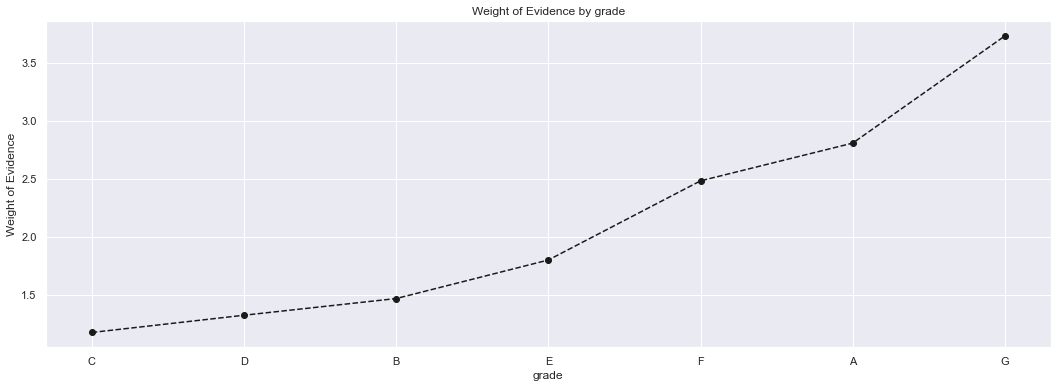

In [51]:
plot_by_woe(df_temp)

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

In [52]:
# Preprocessing the homeownership
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,RENT,150599,0.887722,0.403720,133690.0,16909.0,0.396978,0.466339,0.643745,NaN,NaN,inf
1,MORTGAGE,188956,0.914483,0.506546,172797.0,16159.0,0.513102,0.445655,0.718814,0.026761,0.075069,inf
2,OWN,33295,0.905181,0.089256,30138.0,3157.0,0.089492,0.087068,2.341445,0.009302,1.622631,inf
3,OTHER,137,0.795620,0.000367,109.0,28.0,0.000324,0.000772,6.937605,0.109561,4.596160,inf
4,NONE,40,0.850000,0.000107,34.0,6.0,0.000101,0.000165,8.544165,0.054380,1.606559,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.150000,inf,inf


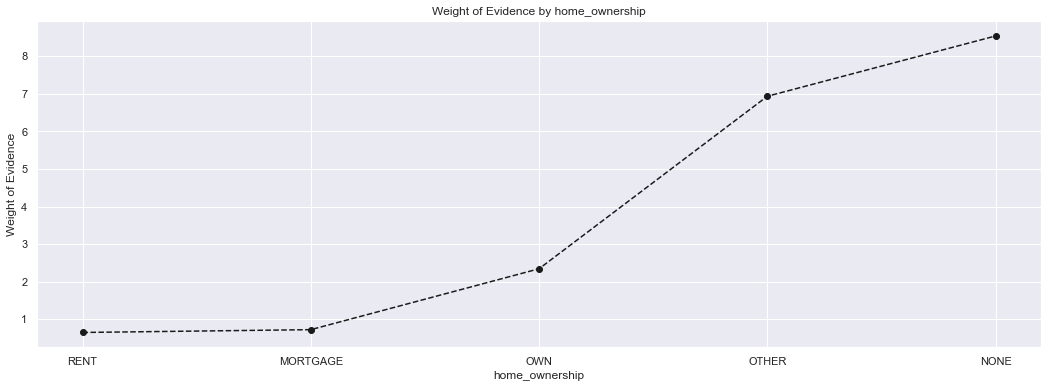

In [53]:
plot_by_woe(df_temp)

In [55]:
# Create dummy variables for home ownwership
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:ANY']])

In [61]:
# Create dummy variables for the states
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp.sort_values(by = 'n_obs', ascending = True)

/Users/oghenevwedeagboro-jimoh/anaconda3/lib/python3.6/site-packages/pandas/core/algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
48,ME,2,1.000000,0.000005,2.0,0.0,0.000006,0.000000,inf,0.230769,inf,inf
49,ID,10,1.000000,0.000027,10.0,0.0,0.000030,0.000000,inf,0.000000,NaN,inf
46,NE,13,0.461538,0.000035,6.0,7.0,0.000018,0.000193,7.779343,0.460057,1.405600,inf
47,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000083,9.137466,0.307692,1.358123,inf
45,VT,727,0.921596,0.001949,670.0,57.0,0.001989,0.001572,6.373743,0.009852,0.089450,inf
41,SD,801,0.911361,0.002147,730.0,71.0,0.002168,0.001958,6.142947,0.011870,0.068186,inf
44,WY,919,0.931447,0.002464,856.0,63.0,0.002542,0.001737,6.284292,0.009208,0.051721,inf
42,MS,980,0.927551,0.002627,909.0,71.0,0.002699,0.001958,6.160556,0.016190,0.017609,inf
40,AK,1003,0.923230,0.002689,926.0,77.0,0.002750,0.002124,6.074761,0.006639,0.185200,inf
38,DE,1064,0.903195,0.002852,961.0,103.0,0.002854,0.002841,5.761898,0.027406,0.179566,inf


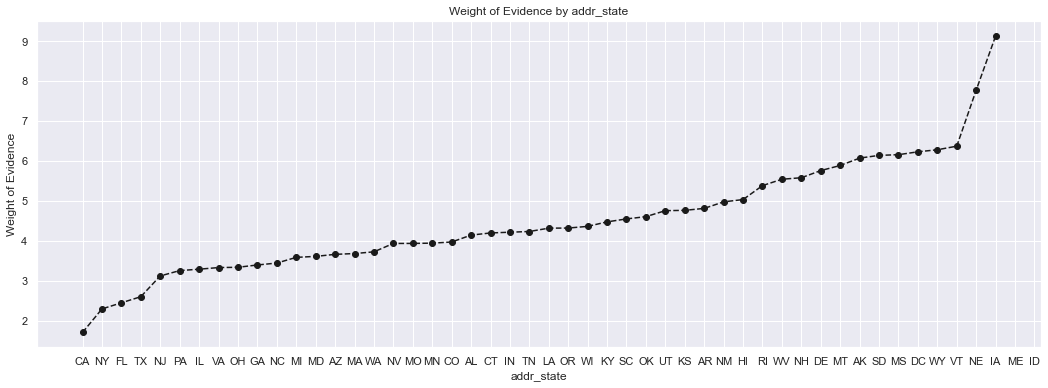

In [57]:
plot_by_woe(df_temp)

In [63]:
# Create n_obs for ND as ND is missing in the list
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

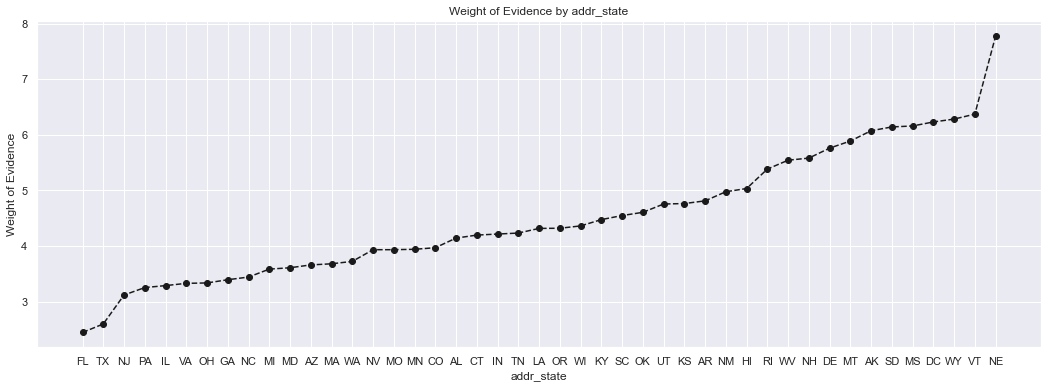

In [64]:
plot_by_woe(df_temp.iloc[2: -3, :])

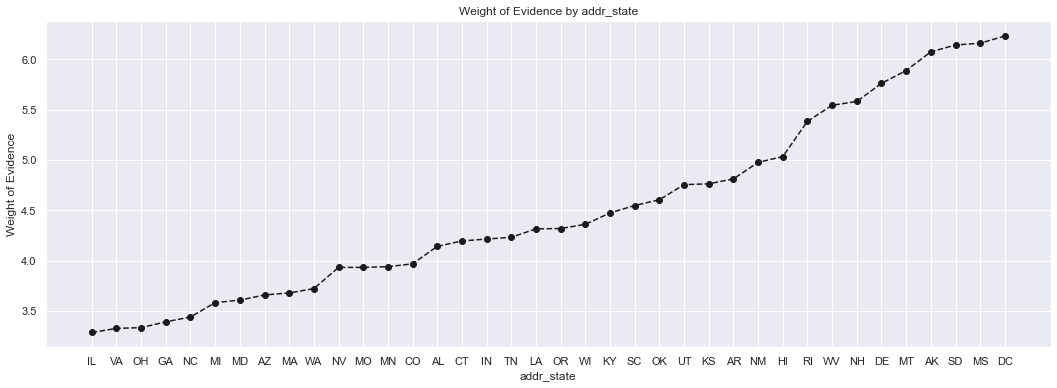

In [65]:
plot_by_woe(df_temp.iloc[6: -6, :])

In [66]:
# Create dummy variables for the states by categorizing them according to their n_obs
df_inputs_prepr['add_state:FL_TX_NJ_PA_IL_VA_OH_GA_VA_NC'] = sum([df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:TX'],
                                                                 df_inputs_prepr['addr_state:NJ'], df_inputs_prepr['addr_state:PA'],
                                                                 df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:VA'],
                                                                 df_inputs_prepr['addr_state:OH'],
                                                                 df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:VA'],
                                                                 df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:MI_MA_MD_AZ_WA_CO_MN_MO'] = sum([df_inputs_prepr['addr_state:MI'], df_inputs_prepr['addr_state:MA'],
                                                            df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:AZ'],
                                                            df_inputs_prepr['addr_state:WA'], df_inputs_prepr['addr_state:CO']])

df_inputs_prepr['addr_state:MN_MO'] = sum([df_inputs_prepr['addr_state:MN'], df_inputs_prepr['addr_state:MO']])

df_inputs_prepr['addr_state:CT_NV_IN_TN'] = sum([df_inputs_prepr['addr_state:CT'], df_inputs_prepr['addr_state:NV'],
                                                df_inputs_prepr['addr_state:IN'], df_inputs_prepr['addr_state:TN']])

df_inputs_prepr['addr_state:OR_WI_AL'] = sum([df_inputs_prepr['addr_state:OR'], df_inputs_prepr['addr_state:WI'],
                                              df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:AK_DE_MT_DC'] = sum([df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:DE'],
                                                df_inputs_prepr['addr_state:MT'], df_inputs_prepr['addr_state:DC']])

df_inputs_prepr['addr_state:RI_NH_WV'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:NH'],
                                             df_inputs_prepr['addr_state:WV']])

df_inputs_prepr['addr_state:ID_ME_ND_NE_IA_VT_SD_WY_MS'] = sum([df_inputs_prepr['addr_state:ID'],df_inputs_prepr['addr_state:ME'],
                                                               df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                                               df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:VT'],
                                                               df_inputs_prepr['addr_state:SD'], df_inputs_prepr['addr_state:WY'],
                                                               df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:SC_LA_KY_KS_OK'] = sum([df_inputs_prepr['addr_state:SC'], df_inputs_prepr['addr_state:LA'],
                                                df_inputs_prepr['addr_state:KY'], df_inputs_prepr['addr_state:KS'],
                                                df_inputs_prepr['addr_state:OK']])

df_inputs_prepr['addr_state:AR_UT_NM_HI'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:UT'],
                                                df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:HI']])

df_inputs_prepr['addr_state:NY'] = df_inputs_prepr['addr_state:NY']

df_inputs_prepr['addr_state:CA'] = df_inputs_prepr['addr_state:CA']

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 2

In [67]:
# Verification Status
df_temp2 = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp2

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134414,0.885086,0.360332,118968.0,15446.0,0.353263,0.425991,0.731268,NaN,NaN,0.03156
1,Source Verified,120030,0.910514,0.321772,109289.0,10741.0,0.324522,0.296230,1.122873,0.025428,0.391606,0.03156
2,Not Verified,118584,0.915064,0.317896,108512.0,10072.0,0.322215,0.277779,1.192168,0.004550,0.069294,0.03156


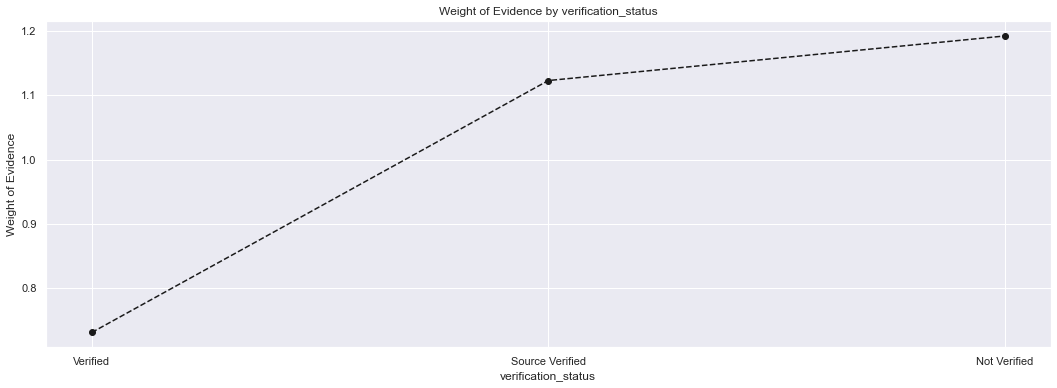

In [68]:
# Plot the dataframe results of verification status
plot_by_woe(df_temp2)

In [69]:
# Dummy variables for the verification status
df_inputs_prepr['verification_status: VERIFIED_SOURCE_VER_NOT_VER_JOINT'] = sum([df_inputs_prepr['verification_status_joint'], df_inputs_prepr['verification_status:Not Verified'],
                                                                                df_inputs_prepr['verification_status:Source Verified'], df_inputs_prepr['verification_status:Verified']])

In [71]:
# Dummy variables for purpose
df_temp3 = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp3

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,debt_consolidation,219183,0.899997,0.587578,197264.0,21919.0,0.585755,0.604512,0.397970,NaN,NaN,-0.037287
1,credit_card,83581,0.924217,0.224061,77247.0,6334.0,0.229377,0.174688,1.665948,0.024220,1.267978,-0.037287
2,other,18884,0.873279,0.050624,16491.0,2393.0,0.048968,0.065997,2.582640,0.050938,0.916692,-0.037287
3,home_improvement,21238,0.912562,0.056934,19381.0,1857.0,0.057550,0.051215,2.880227,0.039283,0.297587,-0.037287
4,small_business,5582,0.795951,0.014964,4443.0,1139.0,0.013193,0.031413,3.232320,0.116611,0.352093,-0.037287
5,major_purchase,7837,0.912594,0.021009,7152.0,685.0,0.021237,0.018892,3.877560,0.116643,0.645240,-0.037287
6,medical,3684,0.881650,0.009876,3248.0,436.0,0.009645,0.012025,4.294841,0.030944,0.417281,-0.037287
7,moving,2392,0.852425,0.006412,2039.0,353.0,0.006055,0.009736,4.472305,0.029226,0.177464,-0.037287
8,car,4325,0.914451,0.011594,3955.0,370.0,0.011744,0.010204,4.495508,0.062026,0.023204,-0.037287
9,house,1830,0.873770,0.004906,1599.0,231.0,0.004748,0.006371,4.921088,0.040680,0.425579,-0.037287


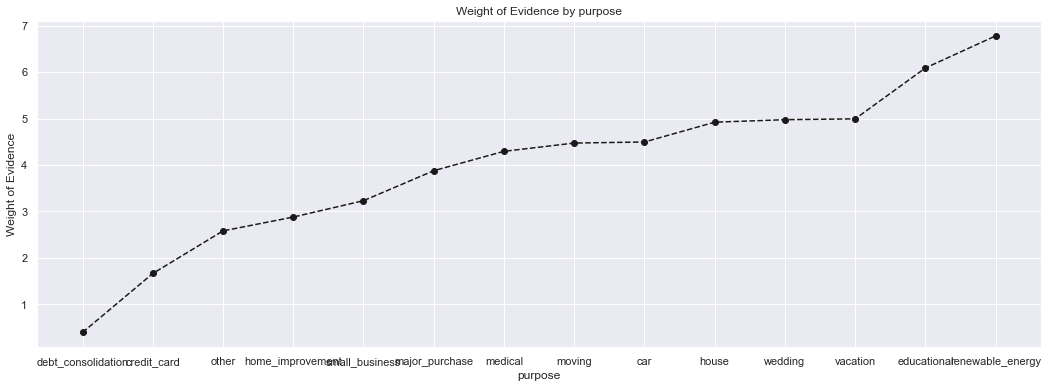

In [75]:
# Plot dataframe results of the purpose
plot_by_woe(df_temp3)

In [ ]:
# Create Dummy Variables for Purpose